### 0. Setting

In [1]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import random

### 1. Augmentation

In [2]:
# 보라색 원이 포함된 augmentation된 이미지들의 경로 설정
image_folder = 'output_folder/*.jpg'
image_paths = glob.glob(image_folder)

### 2. Image Preprocessing

In [3]:
# 1. 이미지를 흑백으로 전환
def convert_to_grayscale(image):
    img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # 확인용 : 흑백 이미지 출력
    print("1단계 : 흑백 변환")
    cv.imshow('Grayscale Image', img_gray)

    return img_gray

In [4]:
# 2. 흑백 이미지에서 보라색 원으로 탐지된 부분의 명도 추출
def extract_brightness(image):
    img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # 보라색 범위로 mask 생성 (기존에 구했던 purple HSV 값 사용)
    lower_purple = np.array([125, 50, 50])
    upper_purple = np.array([150, 255, 255])
    purple_mask = cv.inRange(img_hsv, lower_purple, upper_purple)

    # 확인용 : 보라색 mask img 출력
    print("2-1단계 : 보라색 mask")
    cv.imshow('Purple Mask', purple_mask)

    # 흑백 전환 후, 마스크가 적용된 부분의 명도 값만 추출
    img_gray = convert_to_grayscale(image)
    brightness_values = img_gray[purple_mask > 0]

    # mask 적용된 흑백 img 출력
    img_masked_brightness = np.zeros_like(img_gray)
    img_masked_brightness[purple_mask > 0] = img_gray[purple_mask > 0]

    print("2-2단계 : 보라색 영역의 명도 값")
    cv.imshow('Purple Brightness', img_masked_brightness)

    return brightness_values

### 3. Brightness range

In [5]:
# 3. 각 이미지에서 명도 값 추출 후 공통 명도 범위 계산
def calculate_common_brightness_range(image_paths):
    all_brightness_values = []

    for image_path in image_paths:
        img = cv.imread(image_path)
        brightness_values = extract_brightness(img)
        all_brightness_values.extend(brightness_values)  # 모든 이미지에서 명도 값을 합침

    # 공통 명도 범위 (일반적으로 최댓값과 최솟값으로 범위 설정)
    min_brightness = np.min(all_brightness_values)
    max_brightness = np.max(all_brightness_values)
    common_brightness_range = (min_brightness, max_brightness)

    print(f"3단계-공통 명도 범위 : {common_brightness_range}")

    return common_brightness_range

### 4. Brightness to HSV

In [6]:
# 4. 명도를 보라색 색상 범위로 변환
def brightness_to_purple_hue(common_brightness_range):
    min_brightness, max_brightness = common_brightness_range

    # 명도 값을 보라색 hue 범위로 변환 (대략적으로^^;;)
    hue_min = 125 + (min_brightness / 255) * 25  # 보라색 hue 범위는 125~150
    hue_max = 125 + (max_brightness / 255) * 25

    purple_hue_range = (hue_min, hue_max)
    print(f"4단계-보라색 색상 범위 (Hue): {purple_hue_range}")

    return purple_hue_range

### 5. Visualization

In [7]:
# 5. Hue 값 시각화 (보라색 색조 범위)
def visualize_hue_distribution(purple_hue_range):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(np.linspace(purple_hue_range[0], purple_hue_range[1], 100), color='purple', fill=True)
    plt.title('5단계 : Purple Hue Distribution')
    plt.xlabel('Hue Value')
    plt.ylabel('Density')
    plt.show()

2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값


/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


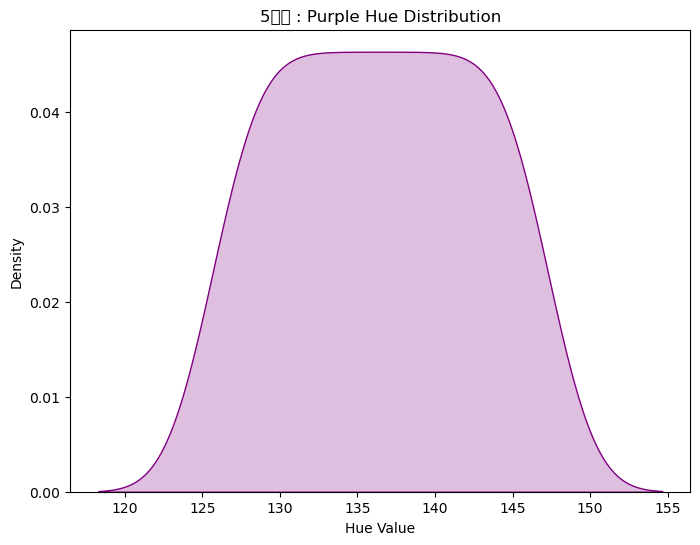

In [8]:
# 랜덤하게 20개의 이미지 선택
random_image_paths = random.sample(image_paths, 20)

# 공통 명도 범위 계산
common_brightness_range = calculate_common_brightness_range(random_image_paths)

# 공통 명도 범위를 보라색 hue 범위로 변환
purple_hue_range = brightness_to_purple_hue(common_brightness_range)

# 보라색 hue 분포 시각화
visualize_hue_distribution(purple_hue_range)

### 6. Model Simple Comparison

In [9]:
import cv2 as cv
import numpy as np
import glob
import time
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [10]:
# 보라색 픽셀 탐지를 위한 마스크 생성 (HSV)
def extract_purple_pixels(image):
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    lower_purple = np.array([125, 50, 50])
    upper_purple = np.array([150, 255, 255])
    purple_mask = cv.inRange(hsv_image, lower_purple, upper_purple)
    
    return purple_mask

In [11]:
# K-means 클러스터링 적용
def apply_kmeans(pixels):
    start_time = time.time()

    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(pixels)

    end_time = time.time()
    duration = end_time - start_time

    return kmeans.labels_, duration

# DBSCAN 클러스터링 적용
def apply_dbscan(pixels):
    start_time = time.time()

    dbscan = DBSCAN(eps=3, min_samples=10)
    labels = dbscan.fit_predict(pixels)

    end_time = time.time()
    duration = end_time - start_time

    return labels, duration

# GMM 클러스터링 적용
def apply_gmm(pixels):
    start_time = time.time()

    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(pixels)
    labels = gmm.predict(pixels)

    end_time = time.time()
    duration = end_time - start_time

    return labels, duration

# 군집화 결과 시각화
def visualize_clustering(image, pixel_coords, labels, title):
    clustered_image = np.zeros_like(image)
    for i, (x, y) in enumerate(pixel_coords):
        if labels[i] == 1:  # 군집 라벨이 1인 픽셀만 보라색으로 표시
            clustered_image[x, y] = image[x, y]

    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(cv.cvtColor(clustered_image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# 성능 비교 및 군집화 결과 시각화
def compare_algorithms(image_paths):
    times = {'K-means': [], 'DBSCAN': [], 'GMM': []}

    for idx, image_path in enumerate(image_paths):
        img = cv.imread(image_path)
        purple_mask = extract_purple_pixels(img)

        # 보라색 픽셀 위치 추출
        pixel_coords = np.column_stack(np.where(purple_mask > 0))

        print(f"=== Image {idx+1} ===")

        # K-means 적용
        kmeans_labels, kmeans_time = apply_kmeans(pixel_coords)
        times['K-means'].append(kmeans_time)
        print(f"K-means: {kmeans_time:.4f} 초")

        visualize_clustering(img, pixel_coords, kmeans_labels, f'K-means Clustering (Image {idx+1})')


        # DBSCAN 적용
        dbscan_labels, dbscan_time = apply_dbscan(pixel_coords)
        times['DBSCAN'].append(dbscan_time)
        print(f"DBSCAN: {dbscan_time:.4f} 초")

        visualize_clustering(img, pixel_coords, dbscan_labels, f'DBSCAN Clustering (Image {idx+1})')


        # GMM 적용
        gmm_labels, gmm_time = apply_gmm(pixel_coords)
        times['GMM'].append(gmm_time)
        print(f"GMM: {gmm_time:.4f} 초")

        visualize_clustering(img, pixel_coords, gmm_labels, f'GMM Clustering (Image {idx+1})')


    return times

In [12]:
# 성능 비교 시각화 (처리 시간)
def visualize_process_time(times):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=[times['K-means'], times['DBSCAN'], times['GMM']], ci=None)

    plt.xticks([0, 1, 2], ['K-means', 'DBSCAN', 'GMM'])
    plt.ylabel('실행 시간 (초)')
    plt.title('K-Means, DBSCAN, GMM 성능 비교 (실행 시간)')

    plt.show()

=== Image 1 ===
K-means: 0.5990 초


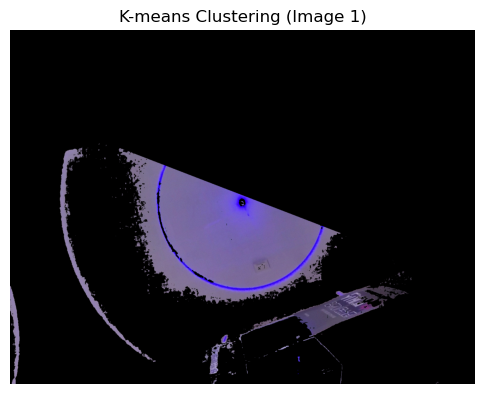

DBSCAN: 6.4700 초


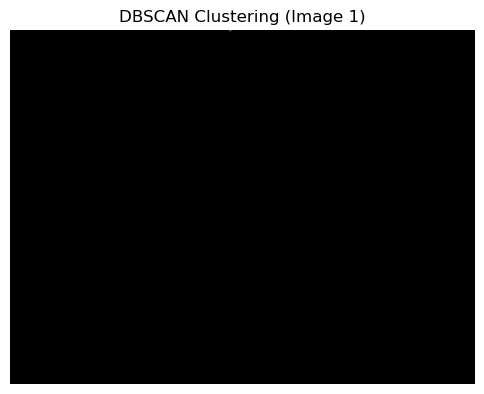

GMM: 2.4217 초


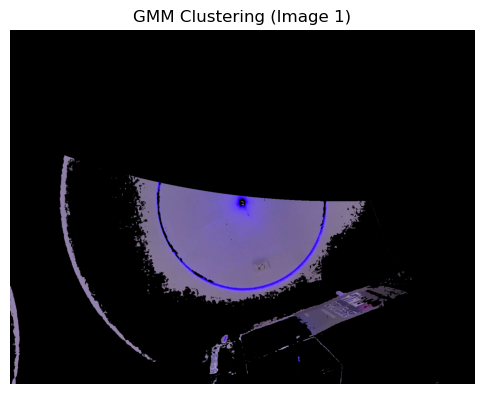

=== Image 2 ===
K-means: 0.7001 초


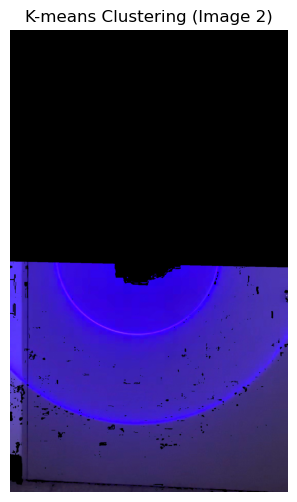

DBSCAN: 25.4591 초


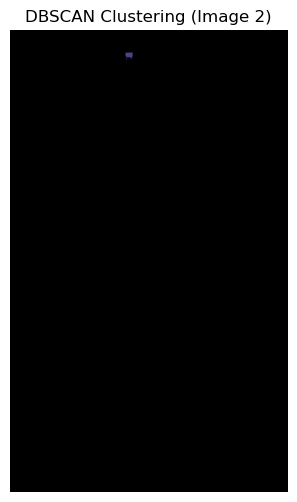

GMM: 4.0265 초


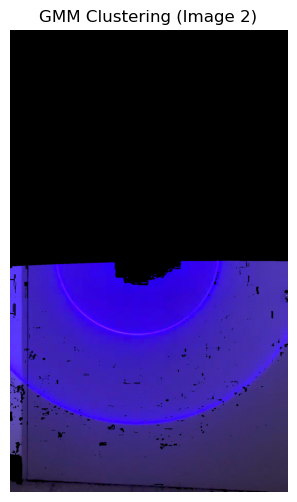

=== Image 3 ===
K-means: 0.2096 초


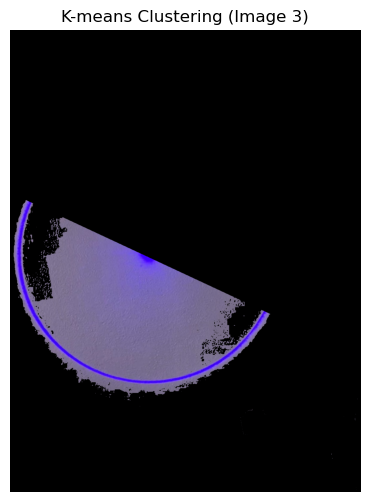

DBSCAN: 6.4302 초


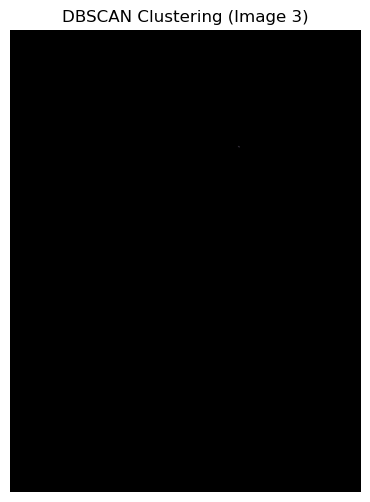

GMM: 1.6207 초


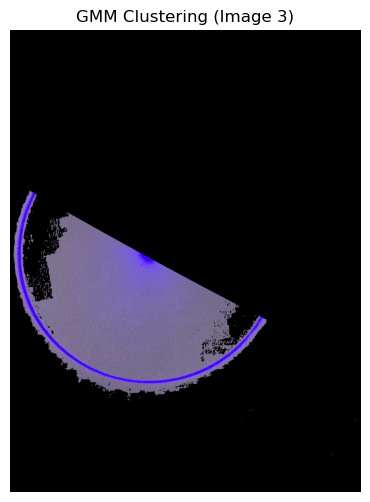

=== Image 4 ===
K-means: 0.2386 초


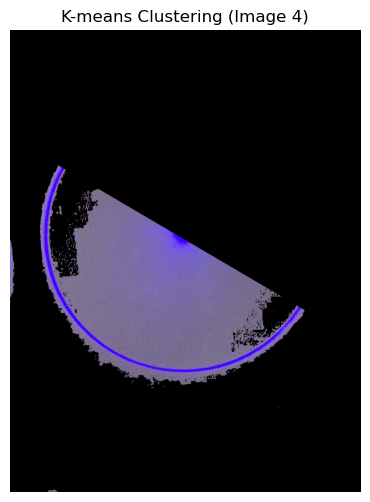

DBSCAN: 7.0818 초


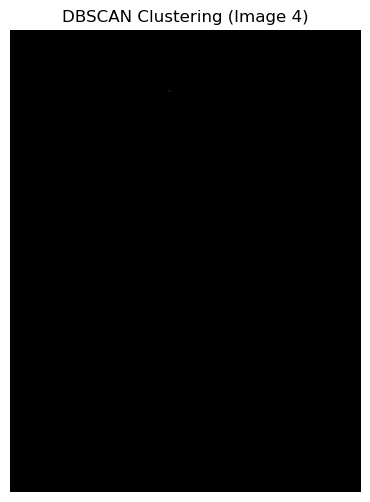

GMM: 1.7069 초


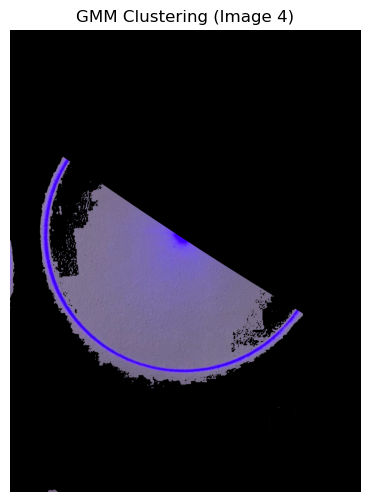

=== Image 5 ===
K-means: 0.5064 초


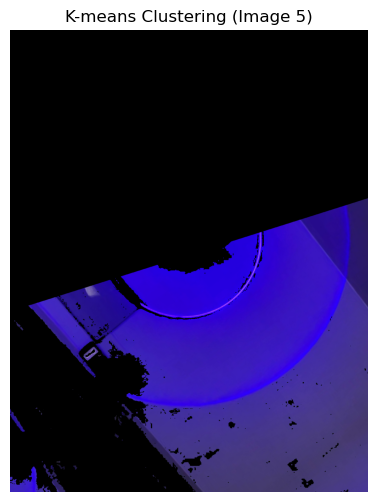

DBSCAN: 17.4520 초


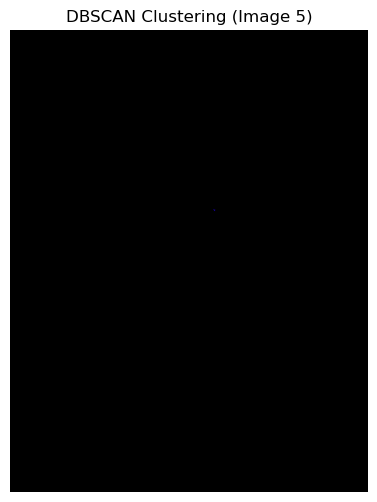

GMM: 3.6224 초


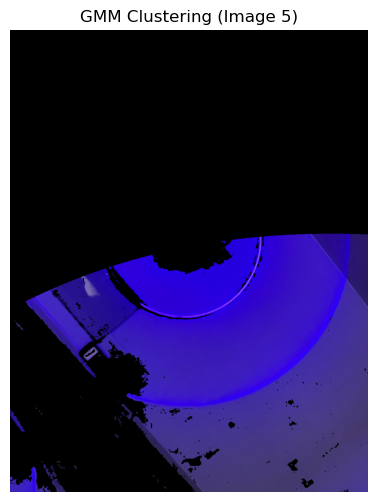

/var/folders/my/bphk0twx0r7dx_xpdxkb918m0000gn/T/ipykernel_30384/3253554929.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=[times['K-means'], times['DBSCAN'], times['GMM']], ci=None)
/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/si

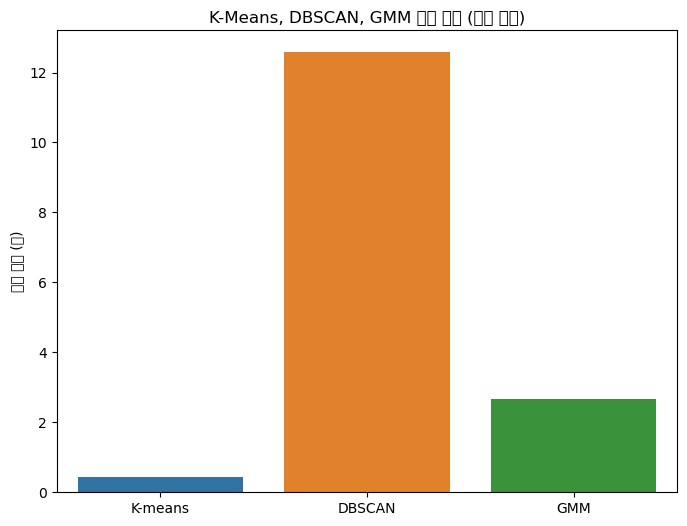

In [13]:
# random으로 5개 이미지만 성능 비교 및 결과 시각화
random_image_paths = random.sample(image_paths, 5)

# 비지도학습 모델들 성능 비교 및 군집화 결과 시각화
times = compare_algorithms(random_image_paths)

# 실행 시간에 대한 성능 비교 시각화
visualize_process_time(times)